## Redes Neurais e Aprendizado Profundo

#### Datasets e Dataloader pytorch

Moacir A Ponti - 2022

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor

from torch.utils.data import DataLoader

In [ ]:
FashionMNIST

torchvision.datasets.mnist.FashionMNIST

Podemos carregar um dataset já existente, utilizando os seguintes parâmetros:
- `root`: caminho onde os dados serão armazenados localmente
- `train`: variável binária que define se carregar os dados de treinamento (`True`) o teste (`False`)
- `download`: se `True` faz download da Internet caso os dados não estejam disponíveis localmente
- `transform` e `target_transform` especifica transformações para as features e labels.

In [ ]:
training_data = FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Agora o `training_data` contem tensores

In [ ]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

Cada posição é uma tupla contendo: features (imagem nesse caso) e o rótulo da classe

In [ ]:
type(training_data[0])

tuple

In [ ]:
training_data[0][1]

9

In [ ]:
# exibindo o formato das features e o rótulo do primeiro exemplo
training_data[0][0].shape, training_data[0][1]

(torch.Size([1, 28, 28]), 9)

Podemos fazer melhor! Mostrar as imagens efetivamente (ao menos algumas delas)

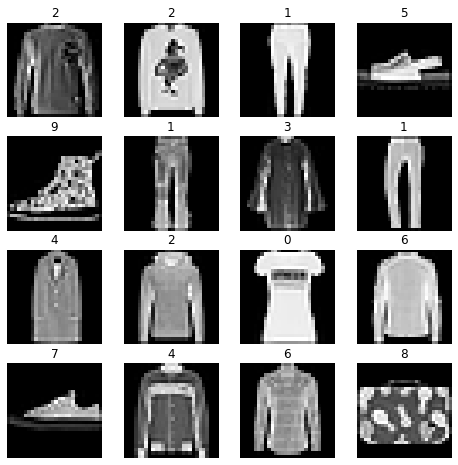

In [ ]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Ainda mais legal se tivermos um dicionário com o significado das classes

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

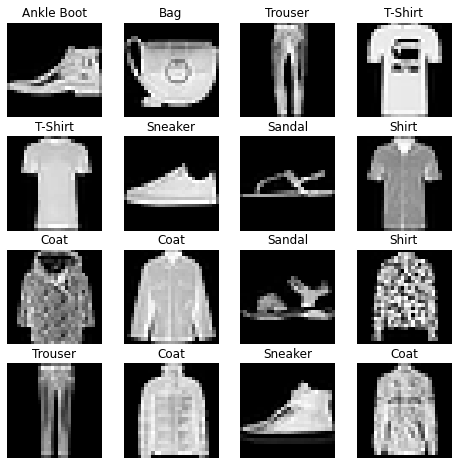

In [ ]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

--- 
## Dataloader
É uma classe que combina um dataset com um amostrador, provendo uma forma de iterar sobre o dataset:
- por mini-batches
- com opção de aleatorizar


In [ ]:
train_dataloader = DataLoader(training_data, batch_size=2, shuffle=True)

In [ ]:
train_dataloader, iter(train_dataloader)

(<torch.utils.data.dataloader.DataLoader at 0x7f20126fb5d0>,
 <torch.utils.data.dataloader._SingleProcessDataLoaderIter at 0x7f2011dce750>)

In [ ]:
# com next pegamos o próximo `batch` via iterador
next(iter(train_dataloader))

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]]]), tensor([0, 3])]

In [ ]:
next(iter(train_dataloader))[1][0]

tensor(8)

Feature batch shape: torch.Size([2, 1, 28, 28])
Labels batch shape: torch.Size([2])



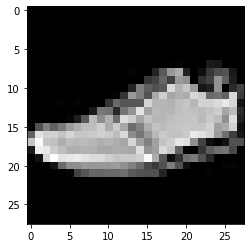

Label: Sneaker


In [ ]:
train_features, train_labels = next(iter(train_dataloader))
print(f'Feature batch shape: {train_features.size()}')
print(f'Labels batch shape: {train_labels.size()}\n')
img = train_features[0].squeeze()
label = train_labels[0].item()
plt.imshow(img, cmap='gray')
plt.show()
print(f'Label: {labels_map[label]}')